In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io.arff import loadarff

from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

## Open numpy file 

In [34]:
data_ex = np.load('./DCASE2017_development_set/mfcc_numpy/a001_0_10.npy')

In [3]:
df = pd.DataFrame(data_ex)
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-480.013564,148.778373,18.093068,-10.646346,-19.577508,-29.147398,14.938957,11.991594,1.357415,-5.223202,...,0.507394,-1.365997,0.401697,-0.088747,0.560064,0.021328,-0.330414,-1.192525,-0.223220,-0.287047
1,-532.388856,210.179972,-22.094512,30.360074,-28.866128,-5.418199,12.914695,15.043829,12.614160,-5.124618,...,0.507394,-1.365997,0.401697,-0.088747,0.560064,0.021328,-0.330414,-1.192525,-0.223220,-0.287047
2,-543.884257,209.987982,-23.570005,25.715485,-23.168608,-2.938968,2.750924,9.682825,10.661104,-2.502524,...,0.507394,-1.365997,0.401697,-0.088747,0.560064,0.021328,-0.330414,-1.192525,-0.223220,-0.287047
3,-548.964207,186.732433,-16.683800,30.385179,-4.901054,9.123057,-6.160044,3.748734,14.397111,10.146564,...,0.507394,-1.365997,0.401697,-0.088747,0.560064,0.021328,-0.330414,-1.192525,-0.223220,-0.287047
4,-564.911439,143.381106,-0.441330,26.107275,11.908887,38.151599,-0.693808,14.974146,-5.160921,-0.129447,...,0.507394,-1.365997,0.401697,-0.088747,0.560064,0.021328,-0.330414,-1.192525,-0.223220,-0.287047
5,-577.456316,129.263376,-10.295998,39.024569,20.343389,56.165668,-5.863467,13.312510,-1.023670,-2.831000,...,1.610700,0.217628,0.505978,1.276706,0.538440,0.186703,-0.512485,-1.601170,-1.062419,0.759447
6,-563.986477,163.654076,-5.694853,38.474713,14.691226,46.076168,-6.359969,5.698434,-2.653272,-1.640681,...,1.683456,0.989482,0.301323,0.847712,-0.465967,0.176792,-0.465370,-0.876925,-0.776488,0.318206
7,-605.000497,147.723012,-22.807519,36.107785,16.632964,46.797891,8.309809,10.746231,9.858831,-0.810274,...,1.521929,1.765580,0.365834,-0.119102,-1.541548,-0.204477,0.317972,0.074609,-0.123828,0.062657
8,-612.699703,149.806618,-25.038671,40.015227,14.762693,43.315720,5.522053,-0.444969,14.189791,6.301608,...,0.623987,0.927347,-0.654280,-0.351896,-1.131446,-0.429598,0.058132,0.394554,0.734498,-0.870271
9,-626.540358,148.359013,-32.945106,39.658765,15.661410,38.040921,11.234913,7.210041,14.334782,-1.085643,...,-0.768741,-0.512647,-0.596500,-1.257813,-1.421346,-1.033865,0.422504,0.784266,0.405983,-0.308589


### Array Dimension

In [4]:
print(df.ndim)

2


### Array Shape 

In [5]:
print(df.shape)

(501, 60)


### Data Type 

In [6]:
print(df.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
dtype: object


In [7]:
df.index

RangeIndex(start=0, stop=501, step=1)

## Open arff file 

In [8]:
data_arff = loadarff(open('./DCASE2017_development_set/mfcc_weka/a001_0_10.arff', 'r'))
data_arff_np = np.array(data_arff[0])

In [9]:
df2 = pd.DataFrame(data_arff_np)
df2

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59,class
0,-480.013564,148.778373,18.093068,-10.646346,-19.577508,-29.147398,14.938957,11.991594,1.357415,-5.223202,...,-1.365997,0.401697,-0.088747,0.560064,0.021328,-0.330414,-1.192525,-0.223220,-0.287047,b'residential_area'
1,-532.388856,210.179972,-22.094512,30.360074,-28.866128,-5.418199,12.914695,15.043829,12.614160,-5.124618,...,-1.365997,0.401697,-0.088747,0.560064,0.021328,-0.330414,-1.192525,-0.223220,-0.287047,b'residential_area'
2,-543.884257,209.987982,-23.570005,25.715485,-23.168608,-2.938968,2.750924,9.682825,10.661104,-2.502524,...,-1.365997,0.401697,-0.088747,0.560064,0.021328,-0.330414,-1.192525,-0.223220,-0.287047,b'residential_area'
3,-548.964207,186.732433,-16.683800,30.385179,-4.901054,9.123057,-6.160044,3.748734,14.397111,10.146564,...,-1.365997,0.401697,-0.088747,0.560064,0.021328,-0.330414,-1.192525,-0.223220,-0.287047,b'residential_area'
4,-564.911439,143.381106,-0.441330,26.107275,11.908887,38.151599,-0.693808,14.974146,-5.160921,-0.129447,...,-1.365997,0.401697,-0.088747,0.560064,0.021328,-0.330414,-1.192525,-0.223220,-0.287047,b'residential_area'
5,-577.456316,129.263376,-10.295998,39.024569,20.343389,56.165668,-5.863467,13.312510,-1.023670,-2.831000,...,0.217628,0.505978,1.276706,0.538440,0.186703,-0.512485,-1.601170,-1.062419,0.759447,b'residential_area'
6,-563.986477,163.654076,-5.694853,38.474713,14.691226,46.076168,-6.359969,5.698434,-2.653272,-1.640681,...,0.989482,0.301323,0.847712,-0.465967,0.176792,-0.465370,-0.876925,-0.776488,0.318206,b'residential_area'
7,-605.000497,147.723012,-22.807519,36.107785,16.632964,46.797891,8.309809,10.746231,9.858831,-0.810274,...,1.765580,0.365834,-0.119102,-1.541548,-0.204477,0.317972,0.074609,-0.123828,0.062657,b'residential_area'
8,-612.699703,149.806618,-25.038671,40.015227,14.762693,43.315720,5.522053,-0.444969,14.189791,6.301608,...,0.927347,-0.654280,-0.351896,-1.131446,-0.429598,0.058132,0.394554,0.734498,-0.870271,b'residential_area'
9,-626.540358,148.359013,-32.945106,39.658765,15.661410,38.040921,11.234913,7.210041,14.334782,-1.085643,...,-0.512647,-0.596500,-1.257813,-1.421346,-1.033865,0.422504,0.784266,0.405983,-0.308589,b'residential_area'


In [10]:
df2.index

RangeIndex(start=0, stop=501, step=1)

### Import data from mfcc_weka dir

In [11]:
dataset = pd.DataFrame()

In [12]:
cnt = 1
for filename in os.listdir('/Users/yihang/jupyter_dir/Machine_Learning_and_Pattern_Classification/DCASE2017_development_set/mfcc_weka'):
    if(cnt>50):
        break
    filename = './DCASE2017_development_set/mfcc_weka/' + filename
    # print(filename)
    temp = loadarff(open(filename, 'r'))
    data_temp = np.array(temp[0])
    df_temp = pd.DataFrame(data_temp)
    df_temp['class'] = df_temp['class'].str.decode("utf-8")
    dataset = dataset.append(df_temp)
    cnt+=1

In [13]:
dataset

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59,class
0,-423.092018,98.138765,-15.581264,52.244847,5.498036,23.703747,8.298149,0.542285,-3.200009,-20.413140,...,-0.248068,-0.337745,0.249731,0.535278,1.195060,0.658872,-0.109640,-0.311804,-0.929845,cafe/restaurant
1,-403.848773,116.668241,-21.603352,37.745734,0.829328,17.138180,8.339844,-6.664275,6.339446,10.530777,...,-0.248068,-0.337745,0.249731,0.535278,1.195060,0.658872,-0.109640,-0.311804,-0.929845,cafe/restaurant
2,-396.027930,111.428921,-39.536767,31.710148,-2.793445,21.740365,2.836563,-12.151431,0.048025,15.573754,...,-0.248068,-0.337745,0.249731,0.535278,1.195060,0.658872,-0.109640,-0.311804,-0.929845,cafe/restaurant
3,-402.297387,105.405126,-32.620976,42.028149,-0.460262,22.410458,3.276581,-5.432697,9.587329,22.150064,...,-0.248068,-0.337745,0.249731,0.535278,1.195060,0.658872,-0.109640,-0.311804,-0.929845,cafe/restaurant
4,-398.966105,98.866452,-29.798789,27.216081,2.927259,26.929891,18.638734,-6.136571,4.363000,19.613529,...,-0.248068,-0.337745,0.249731,0.535278,1.195060,0.658872,-0.109640,-0.311804,-0.929845,cafe/restaurant
5,-403.971670,94.747740,-19.515691,17.832040,1.061666,19.768902,10.481942,-13.334474,8.576423,16.500843,...,-0.258464,-0.521937,-0.160176,-0.261155,0.198337,1.282054,0.535862,-0.330728,-0.369350,cafe/restaurant
6,-417.065934,104.797853,-1.617452,30.720360,4.341565,19.672079,12.500971,-7.174119,14.334722,17.149663,...,-0.473692,0.428647,-0.377697,0.642962,0.329090,0.216384,0.279983,-0.164396,0.036597,cafe/restaurant
7,-436.187389,102.924215,-4.179864,34.647535,3.567412,12.921317,11.221077,-4.767072,12.841687,8.932773,...,-0.186678,1.127719,0.329359,0.764465,0.173838,-1.126466,-0.210819,-0.173284,-0.860237,cafe/restaurant
8,-441.068507,114.852968,-0.153224,38.412292,7.572762,23.125390,4.424554,-11.824554,11.910612,12.190976,...,0.476842,0.911203,0.069187,-0.014160,-0.827321,-2.007193,0.168274,0.411119,-1.216825,cafe/restaurant
9,-436.034191,104.415711,-9.842116,36.991438,-1.539546,20.292635,5.105951,-1.028553,4.814479,4.649006,...,0.550049,-0.676177,-0.618509,-1.597785,-1.512796,-1.442894,-0.079121,0.820928,-0.476251,cafe/restaurant


In [14]:
dataset.describe()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_50,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59
count,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,...,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000
mean,-568.100604,123.013985,0.212244,37.034270,6.360622,26.812041,6.690304,10.719768,10.087642,4.734228,...,0.003067,-0.002647,0.000719,-0.002177,-0.000061,-0.003256,0.001561,-0.000710,0.002929,-0.002896
std,114.243694,33.098141,23.771349,13.706343,15.530751,10.183783,11.381537,8.796534,8.374448,6.977738,...,0.617114,0.612479,0.604417,0.599156,0.598615,0.595732,0.580691,0.567066,0.569912,0.579874
min,-821.184336,-125.236899,-94.527489,-21.934895,-52.020319,-13.062351,-54.001805,-30.439949,-24.986611,-23.765474,...,-3.084102,-2.874784,-2.994144,-3.046853,-2.435319,-2.899531,-2.405040,-2.892456,-2.637333,-2.826496
25%,-657.796296,103.265789,-16.407047,28.707032,-3.799609,20.586225,-0.817371,5.104434,4.431259,0.174897,...,-0.402076,-0.403165,-0.393898,-0.397300,-0.400312,-0.391494,-0.382372,-0.377956,-0.375933,-0.384837
50%,-573.781984,125.856911,-2.588473,37.840245,4.820082,27.454666,6.175206,10.953177,9.977574,4.531423,...,0.001984,0.002503,0.000466,-0.003387,-0.002344,-0.001512,0.000394,0.002036,0.005498,-0.002280
75%,-475.863669,145.025573,15.300534,46.495108,15.238857,33.796886,13.844807,16.625191,15.659502,9.168811,...,0.410337,0.399606,0.397309,0.397674,0.397569,0.389571,0.390153,0.373855,0.378537,0.381398
max,-182.393453,225.018849,80.919720,86.851911,57.937315,64.920655,50.791851,43.565609,47.922731,36.522013,...,2.908248,2.664684,2.487585,2.851556,2.790400,3.165909,2.569958,2.746074,2.499133,2.581135


## Data Visualization

### Histogram

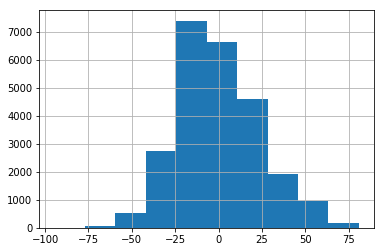

In [33]:
dataset['mfcc_2'].hist()
plt.show()

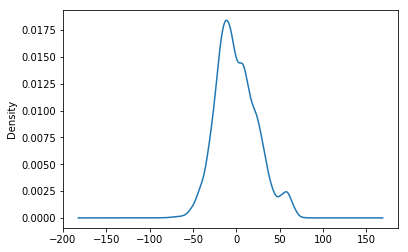

In [16]:
dataset['mfcc_2'].plot(kind='density', subplots=True, sharex=False)
plt.show()

### Box and wisker plots

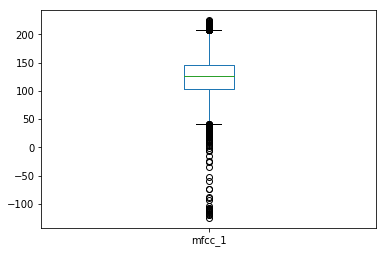

In [17]:
dataset['mfcc_1'].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

### Feature correlation

In [18]:
# Create correlation matrix
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

In [19]:
corr_matrix

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_50,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59
mfcc_0,1.000000,0.286290,0.311551,0.155866,0.201917,0.035924,0.031743,0.196756,0.065118,0.052060,...,0.008755,0.002130,0.007821,0.001344,0.005880,0.003293,0.009680,0.008502,0.008250,0.007168
mfcc_1,0.286290,1.000000,0.160008,0.040332,0.097980,0.052165,0.350377,0.006460,0.095842,0.048890,...,0.010179,0.005443,0.005793,0.012182,0.009157,0.011285,0.012685,0.005303,0.006949,0.014519
mfcc_2,0.311551,0.160008,1.000000,0.017366,0.631020,0.038041,0.319652,0.201895,0.164322,0.071571,...,0.008009,0.001839,0.001300,0.001615,0.004943,0.010690,0.001061,0.002620,0.004990,0.006198
mfcc_3,0.155866,0.040332,0.017366,1.000000,0.239899,0.091511,0.023925,0.049999,0.169809,0.048757,...,0.008277,0.008854,0.005509,0.004536,0.000536,0.010973,0.001693,0.001433,0.000066,0.000809
mfcc_4,0.201917,0.097980,0.631020,0.239899,1.000000,0.061323,0.407081,0.248198,0.354083,0.133784,...,0.004938,0.008637,0.002291,0.007819,0.001208,0.000432,0.002841,0.007171,0.007314,0.004065
mfcc_5,0.035924,0.052165,0.038041,0.091511,0.061323,1.000000,0.235092,0.311828,0.100731,0.029427,...,0.009904,0.008928,0.000798,0.011886,0.005662,0.007588,0.000911,0.004533,0.003609,0.002160
mfcc_6,0.031743,0.350377,0.319652,0.023925,0.407081,0.235092,1.000000,0.187199,0.336333,0.241693,...,0.000263,0.005690,0.005236,0.010139,0.003229,0.002933,0.005422,0.005372,0.000702,0.004106
mfcc_7,0.196756,0.006460,0.201895,0.049999,0.248198,0.311828,0.187199,1.000000,0.386609,0.102858,...,0.006313,0.015547,0.000509,0.008626,0.007765,0.009871,0.002131,0.001077,0.002631,0.000240
mfcc_8,0.065118,0.095842,0.164322,0.169809,0.354083,0.100731,0.336333,0.386609,1.000000,0.418697,...,0.008647,0.015275,0.003964,0.004751,0.019472,0.007828,0.002313,0.003499,0.000287,0.005238
mfcc_9,0.052060,0.048890,0.071571,0.048757,0.133784,0.029427,0.241693,0.102858,0.418697,1.000000,...,0.119055,0.001774,0.001923,0.022050,0.015773,0.011221,0.011322,0.003153,0.005187,0.001226


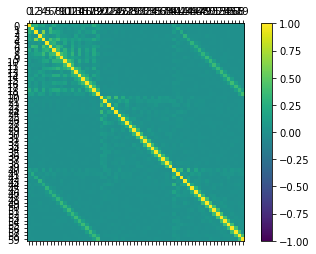

In [20]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,60,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
plt.show()

In [21]:
dataset['class'].unique()

array(['cafe/restaurant', 'tram', 'beach', 'forest_path', 'park', 'train',
       'home', 'bus', 'city_center', 'residential_area', 'grocery_store',
       'library', 'office', 'metro_station', 'car'], dtype=object)

In [23]:
len(dataset.loc[dataset['class'].isin(['forest_path'])])

2505

### Feature selection

In [24]:
X = dataset.drop(['class'], axis=1).values
y = dataset['class'].values
X.shape

(25050, 60)

In [25]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(25050, 13)

In [26]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [27]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.120434)
2. feature 1 (0.077469)
3. feature 2 (0.071886)
4. feature 4 (0.057293)
5. feature 3 (0.050094)
6. feature 6 (0.042197)
7. feature 7 (0.032919)
8. feature 5 (0.032728)
9. feature 8 (0.028974)
10. feature 10 (0.020672)
11. feature 9 (0.019580)
12. feature 12 (0.019333)
13. feature 14 (0.017021)
14. feature 17 (0.015317)
15. feature 11 (0.014324)
16. feature 18 (0.013806)
17. feature 13 (0.013569)
18. feature 15 (0.013238)
19. feature 20 (0.012746)
20. feature 16 (0.012626)
21. feature 40 (0.011933)
22. feature 21 (0.011568)
23. feature 22 (0.011085)
24. feature 19 (0.009850)
25. feature 41 (0.009782)
26. feature 23 (0.009101)
27. feature 43 (0.008999)
28. feature 42 (0.008989)
29. feature 24 (0.008718)
30. feature 26 (0.007881)
31. feature 27 (0.007844)
32. feature 44 (0.007806)
33. feature 25 (0.007770)
34. feature 47 (0.007677)
35. feature 28 (0.007625)
36. feature 45 (0.007548)
37. feature 39 (0.007520)
38. feature 33 (0.007465)
39. feature 35

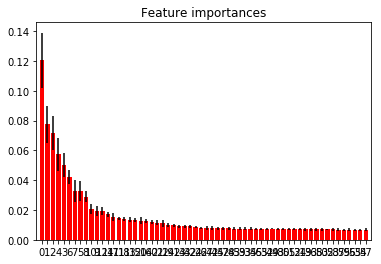

In [28]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Outlier Detection

#### Isolation Forest Algorithm

In [29]:
import math
X = dataset.drop(['class'], axis=1)
dfs = np.split(X, [math.floor(len(X)*0.7)], axis=0)
X_train = dfs[0].values
X_test = dfs[1].values

In [30]:
rng = np.random.RandomState(42)
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [31]:
X_test[np.where(np.array(y_pred_test)<0)]

array([[ -6.19099509e+02,   1.05399065e+02,   2.06160858e+01, ...,
          2.11770860e-01,   1.07703052e+00,   8.55640648e-01],
       [ -5.70763914e+02,   5.58762336e+01,   1.02540633e+01, ...,
         -2.95872663e-01,  -9.75363799e-01,  -9.02037838e-01],
       [ -5.99022062e+02,   9.34183064e+01,   1.71673926e+01, ...,
          1.04404104e-01,   2.92109217e-01,   1.00399357e-01],
       ..., 
       [ -3.85684458e+02,   7.68083018e+01,   1.67142181e+01, ...,
         -6.30266598e-01,  -1.75808071e-01,  -7.92651022e-01],
       [ -3.68850732e+02,   7.05639434e+01,   2.10352904e+01, ...,
         -8.18965560e-01,   6.66094165e-01,   4.11717826e-02],
       [ -4.08610938e+02,   8.50073136e+01,   1.26474488e+01, ...,
          9.45502421e-01,   6.78672690e-01,   6.21266966e-01]])